<a href="https://colab.research.google.com/github/arobiddin/data_scince_ls_works/blob/main/k_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

# Classification
## k-NN

# Diabet kasallagiga tashxis qo’yish.

**Tavsif:**
Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.

In [30]:
import pandas as pd
import numpy as np
import sklearn as skl# scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
435,0,141,0,0,0,42.4,0.205,29,1
556,1,97,70,40,0,38.1,0.218,30,0
501,3,84,72,32,0,37.2,0.267,28,0
356,1,125,50,40,167,33.3,0.962,28,1
645,2,157,74,35,440,39.4,0.134,30,0
9,8,125,96,0,0,0.0,0.232,54,1
301,2,144,58,33,135,31.6,0.422,25,1
393,4,116,72,12,87,22.1,0.463,37,0
26,7,147,76,0,0,39.4,0.257,43,1
187,1,128,98,41,58,32.0,1.321,33,1


**Ustunlar:**



*   Pregnancies: homilador bo’lish soni
*   Glucose: glyukozaga test natijasi
*   BloodPressure: diastolik qon bosimi (mm Hg)
*   SkinThickness: Triceps teri burmasining qalinligi (mm)
*   Insulin: 2 soatlik sarum insulini (mu U/ml)
*   BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
*   DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
*   Age: Yosh (yil)
*   Outcome: Class (0 – diabet yo’q, 1 – diabet)

In [32]:
df.shape


(768, 9)

In [33]:
sum(df.duplicated())


0

In [34]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [36]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [37]:
df = df.drop(['SkinThickness','BloodPressure','DiabetesPedigreeFunction','Insulin'], axis=1)

In [38]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

**ML**

In [136]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [137]:
y_predict = knn.predict(X_test)

**Baholash**

**Jaccard index**

In [138]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.47761194029850745

### Confusion matrix

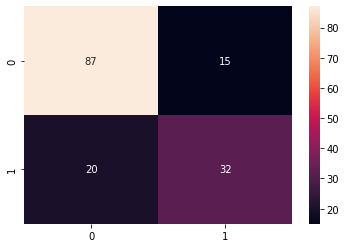

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [140]:
confusion_matrix(y_test, y_predict)

array([[87, 15],
       [20, 32]])

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\nrecall={recall}\nf1={f1}\naccuracy={accuracy}")

precision=0.6808510638297872
recall=0.6153846153846154
f1=0.6464646464646464
accuracy=0.7727272727272727


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.68      0.62      0.65        52

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



### Cross-validation yordamida tekshiramiz

In [143]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       500
           1       0.70      0.57      0.63       268

    accuracy                           0.76       768
   macro avg       0.74      0.72      0.73       768
weighted avg       0.76      0.76      0.76       768



## Eng yaxshi k ni topish

### `for` yordamida

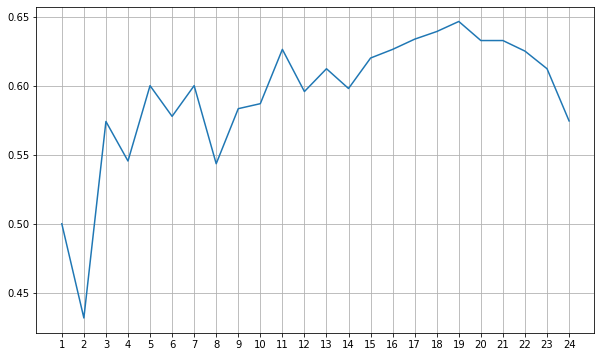

In [144]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

### Grid Search yordamida

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [146]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 19, 17, 20, 18, 16, 15,  9,  7,  4,  2, 10,  3,  1,
        5,  8, 11, 14, 12,  6, 13], dtype=int32)

In [147]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [148]:
knn_gscv.best_score_

0.774849333672863

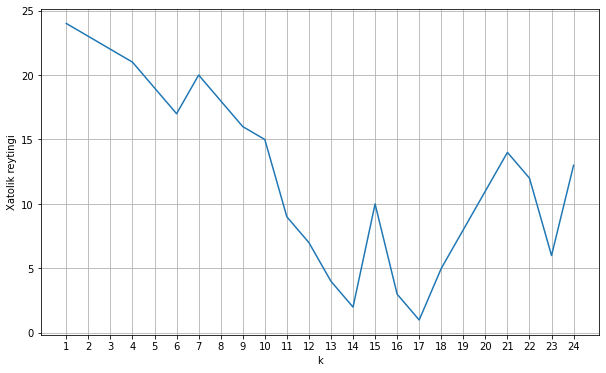

In [149]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()